In [6]:
import pandas as pd

In [15]:
from geostat_pykrige import *

In [34]:
dat = pd.read_csv('/Users/LOng/sengokulab/LDAT_LS_2019/data/dev/house_price_raw.csv')
mdat = pd.read_csv('/Users/LOng/sengokulab/LDAT_LS_2019/data/dev/house_price_pred.csv')

In [35]:
print(dat.head(3))

           px         py     price   station     tokyo
0  139.362310  35.733850  153000.0  0.010620  0.408220
1  139.363027  35.654078  172000.0  0.011653  0.405010
2  139.367082  35.659859  217000.0  0.010110  0.400614


In [36]:
latlon, indep = transform_data(dat, ['px', 'py'], ['station', 'tokyo'])
mlatlon, mindep = transform_data(mdat, ['px', 'py'], ['station', 'tokyo'])

In [37]:
model = LinearRegression(fit_intercept=False)

In [38]:
gmodel = RegressionKriging(regression_model=model,  variogram_model='exponential', nlags=15)

In [39]:
gmodel.fit(indep, latlon, y) #kriging学習

Finished learning regression model
Finished kriging residuals


In [40]:
my = gmodel.predict(mindep, mlatlon)

In [41]:
#交差検証
pred_list = loo_cv(gmodel, dat, 'price', ['px', 'py'], ['station', 'tokyo'])

Finished learning regression model
Finished kriging residuals
Finished learning regression model
Finished kriging residuals
Finished learning regression model
Finished kriging residuals
Finished learning regression model
Finished kriging residuals
Finished learning regression model
Finished kriging residuals
Finished learning regression model
Finished kriging residuals
Finished learning regression model
Finished kriging residuals
Finished learning regression model
Finished kriging residuals
Finished learning regression model
Finished kriging residuals
Finished learning regression model
Finished kriging residuals
Finished learning regression model
Finished kriging residuals
Finished learning regression model
Finished kriging residuals
Finished learning regression model
Finished kriging residuals
Finished learning regression model
Finished kriging residuals
Finished learning regression model
Finished kriging residuals
Finished learning regression model
Finished kriging residuals
Finished

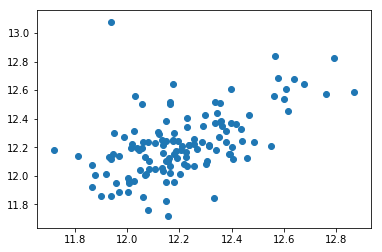

In [42]:
plt.scatter(y, pred_list)
plt.ylim = (11.8, 12.8)
plt.show()

In [43]:
mdat['price'] = my
mdat.head() #

,px,py,price,station,tokyo
0,139.402984,35.767626,12.632913,0.017537,0.374249
1,139.407036,35.767626,12.238458,0.013571,0.370307
2,139.411089,35.767626,11.872609,0.009675,0.366367
3,139.439457,35.767626,11.668949,0.001584,0.338865
4,139.394878,35.763700,13.234921,0.026327,0.381271


In [45]:
gmdat = transform_to_gpd(mdat, 'px', 'py')
gmdat.head()

,px,py,price,station,tokyo,Coordinates
0,139.402984,35.767626,12.632913,0.017537,0.374249,POINT (139.4029835 35.7676260119048)
1,139.407036,35.767626,12.238458,0.013571,0.370307,POINT (139.4070361 35.7676260119048)
2,139.411089,35.767626,11.872609,0.009675,0.366367,POINT (139.4110887 35.7676260119048)
3,139.439457,35.767626,11.668949,0.001584,0.338865,POINT (139.4394569 35.7676260119048)
4,139.394878,35.763700,13.234921,0.026327,0.381271,POINT (139.3948783 35.76370003571429)


In [46]:
rang = set_rang(gmdat, 'price', 10)

/Users/LOng/.local/share/virtualenvs/LDAT_LS_2019-qp6Uijrp/lib/python3.7/site-packages/geopandas/plotting.py:405: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  "empty. Nothing has been displayed.", UserWarning)


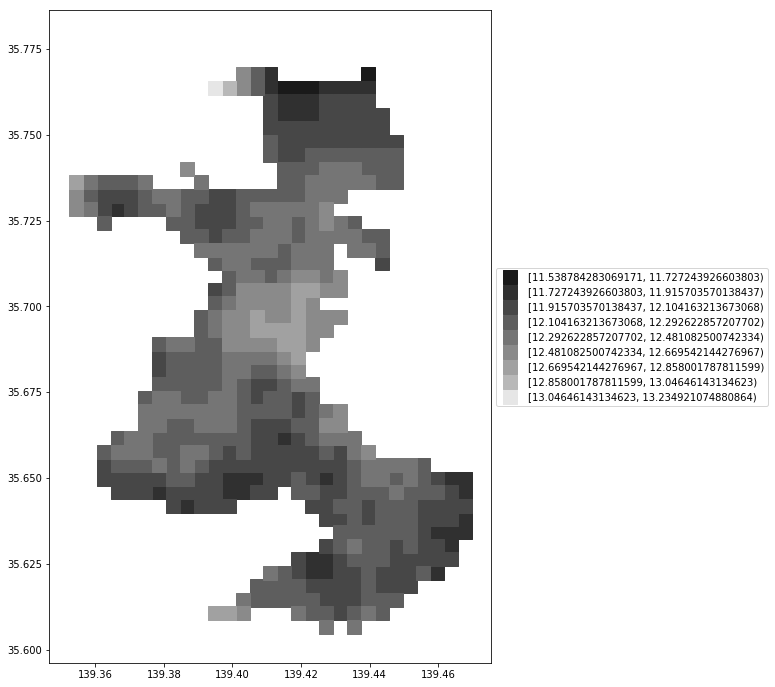

In [47]:
res_fig = plot_kriging_res(gmdat, 'price', rang)

In [49]:
gmdat['sq_resid'] = gmodel.krige_residual(mlatlon)**2

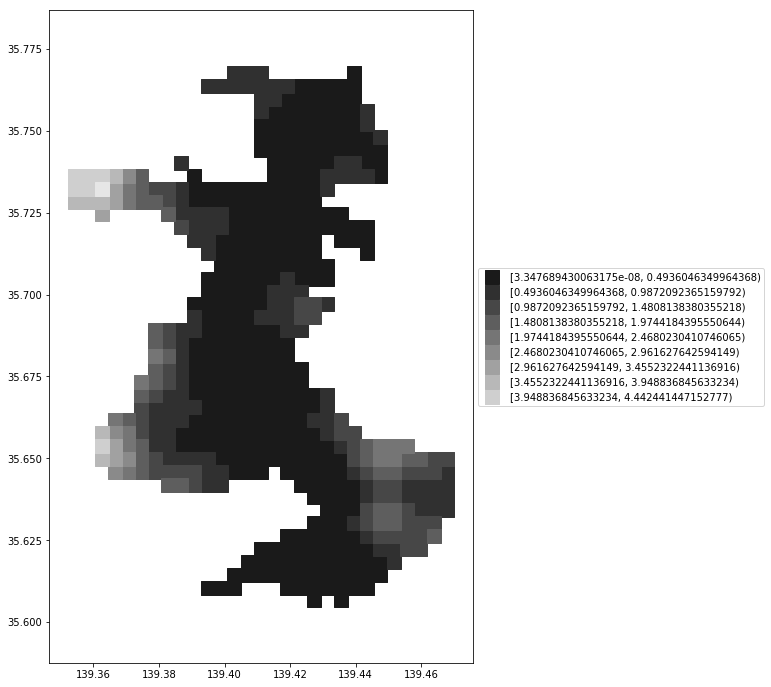

In [50]:
rang = set_rang(gmdat, 'sq_resid', 10)
sq_resid_fig = plot_kriging_res(gmdat, 'sq_resid', rang)

In [51]:
res_fig.savefig('/Users/LOng/sengokulab/LDAT_LS_2019/data/dev/plot/kriging_res_plot.png')
sq_resid_fig.savefig('/Users/LOng/sengokulab/LDAT_LS_2019/data/dev/plot/kriging_resid_plot.png')